<a href=https://www.buzzfeednews.com/article/peteraldhous/american-health-care>Buzzfeed article</a>
<br>
<a href=https://github.com/BuzzFeedNews/2017-05-us-health-care>Buzzfeed repo</a>

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.patches as mpatches

# census dataset - counties and states ma

In [9]:
health_social = pd.read_csv('https://github.com/BuzzFeedNews/2017-05-us-health-care/blob/master/data/Bradley/health_social.csv?raw=true')
health_social.head(100)

,Country,Health,Social
0,France,12.66,32.400
1,Sweden,13.03,30.200
2,Denmark,11.57,30.400
3,Austria,11.17,30.000
4,Germany,12.03,29.000
5,Belgium,10.59,29.700
6,Finland,10.82,29.400
7,Italy,9.40,29.400
8,US,18.00,19.500
9,Netherlands,13.25,23.800


In [15]:
prices = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2017-05-us-health-care/master/data/IFHP/prices.csv')
prices.head()
prices.columns
# prices.intervention.unique()
prices.type.unique()

array(['Diagnosis', 'Diagnossis', 'Surgery', 'Drug'], dtype=object)

In [4]:
# ihme = pd.read_csv('https://github.com/BuzzFeedNews/2017-05-us-health-care/blob/master/data/IHME/ihme.XLSX?raw=true')
# ihme.head()

In [5]:
health_spending_per_cap = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2017-05-us-health-care/master/data/OECD/health_spending_per_cap.csv')
health_spending_per_cap.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HEALTHEXP,TOT,USD_CAP,A,1971,223.5920,NaN
1,AUS,HEALTHEXP,TOT,USD_CAP,A,1972,239.1784,NaN
2,AUS,HEALTHEXP,TOT,USD_CAP,A,1973,264.0303,NaN
3,AUS,HEALTHEXP,TOT,USD_CAP,A,1974,322.3286,NaN
4,AUS,HEALTHEXP,TOT,USD_CAP,A,1975,401.8512,NaN


In [6]:
life_expect_birth = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2017-05-us-health-care/master/data/OECD/life_expect_birth.csv')
life_expect_birth.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,LIFEEXP,TOT,YR,A,1960,70.9,NaN
1,AUS,LIFEEXP,TOT,YR,A,1961,71.2,NaN
2,AUS,LIFEEXP,TOT,YR,A,1962,71.0,NaN
3,AUS,LIFEEXP,TOT,YR,A,1963,71.1,NaN
4,AUS,LIFEEXP,TOT,YR,A,1964,70.7,NaN


In [7]:
nations = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2017-05-us-health-care/master/data/OECD/nations.csv')
nations.head(100)

,country,isoc3
0,Australia,AUS
1,Austria,AUT
2,Belgium,BEL
3,Canada,CAN
4,Denmark,DNK
5,Finland,FIN
6,France,FRA
7,Germany,DEU
8,Greece,GRC
9,Iceland,ISL


Reproduce first plot:

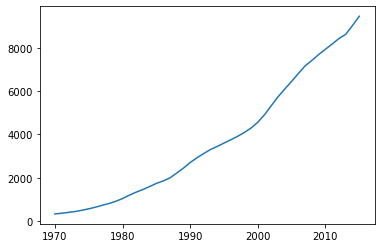

In [8]:
# plot healthcare spending per person over life expectancy
# health_spending_per_cap vs. life_expect_birth
health_spending_per_cap_bycountry = health_spending_per_cap.groupby("LOCATION")
health_spending_per_cap_US = health_spending_per_cap_bycountry.get_group("USA")
healthcare_cost = health_spending_per_cap_US["Value"]
healthcare_time = health_spending_per_cap_US["TIME"]

life_expect_bycountry = life_expect_birth.groupby("LOCATION")
life_expect_US = life_expect_bycountry.get_group("USA")
life_expect_time = life_expect_bycountry.get_group("USA")

# life_expect = life_expect_birth["Value"]
plt.plot(healthcare_time, healthcare_cost)
# plt.plot(life_expect_time, life_expect_US)
# type(healthcare_cost)
# # healthcare_cost.plot.box()

In [105]:
# Import NHE data
nhe2019 = pd.read_csv('NHE2019.csv', header=1)
nhe2019.head()

,Expenditure Amount (Millions),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Total National Health Expenditures,"27,122","29,060","31,765","34,559","38,245","41,627","45,753","51,187","58,016",...,"2,589,719","2,676,415","2,783,097","2,859,517","3,008,305","3,177,724","3,324,528","3,465,878","3,629,690","3,795,384"
1,Out of pocket,"12,777","13,192","14,083","15,169","16,666","17,858","18,126","17,977","19,942",...,"301,397","310,229","323,063","330,410","339,918","353,807","367,277","374,480","388,789","406,507"
2,Health Insurance,"7,325","8,044","8,786","9,662","10,712","11,726","15,362","20,796","24,019",...,"1,832,637","1,902,581","1,971,512","2,021,347","2,155,186","2,293,270","2,405,571","2,506,130","2,633,777","2,752,837"
3,Private Health Insurance,"5,640","6,276","6,964","7,721","8,793","9,775","9,985","10,139","11,470",...,"820,111","851,112","877,856","881,300","926,855","981,644","1,039,609","1,091,138","1,152,174","1,195,146"
4,Medicare,-,-,-,-,-,-,"1,842","4,924","6,218",...,"519,536","544,596","568,368","588,919","617,572","647,835","675,768","704,716","749,140","799,356"


In [167]:
# Plot total expenditure over time
totalExpenditure = nhe2019.iloc[0][1:].str.replace(",","").astype(int) # import row 0, remove commas, and convert to integer
outOfPocket = nhe2019.iloc[1][1:].str.replace(",","").astype(int)
healthInsurance = nhe2019.iloc[2][1:].str.replace(",","").astype(int)
yearsNHE = np.arange(1960, 2019+1)

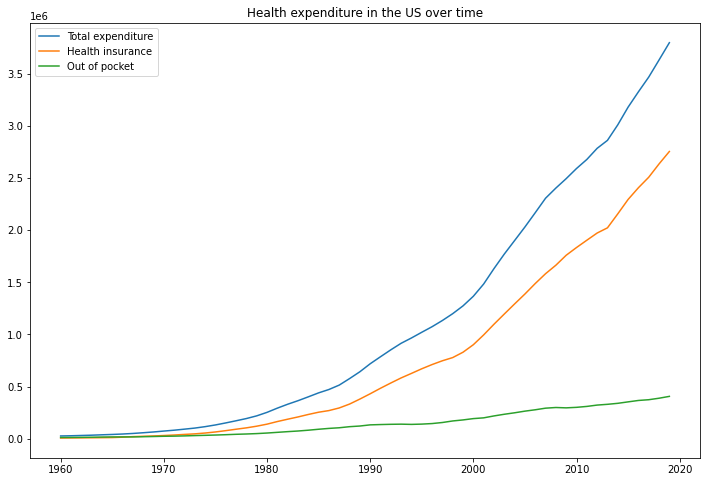

In [136]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
ax1.set_title("Health expenditure in the US over time")
ax1.plot(yearsNHE, totalExpenditure)
ax1.plot(yearsNHE, healthInsurance)
ax1.plot(yearsNHE, outOfPocket)
ax1.legend(["Total expenditure", "Health insurance", "Out of pocket"])
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


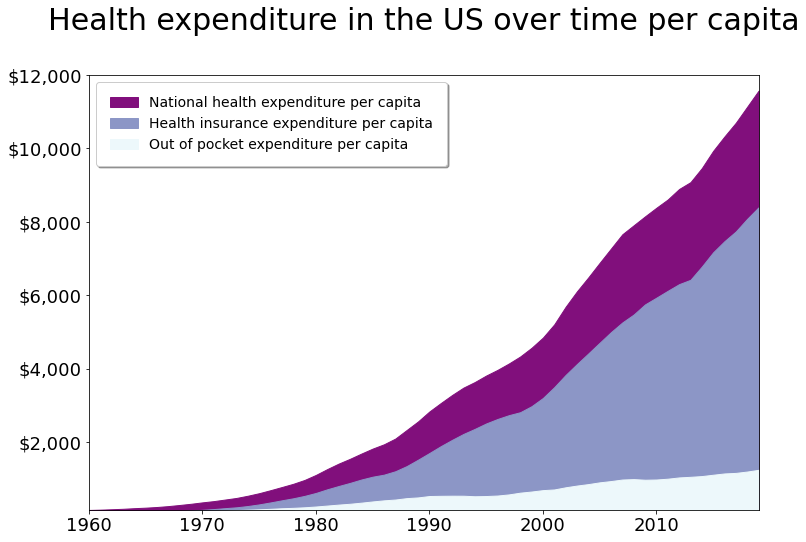

In [271]:
# Calculate expenditure per capita
population = nhe2019.iloc[36][1:].astype(int)
totalExpenditure_percap = totalExpenditure/population # convert from millions to thousands
healthInsurance_percap = healthInsurance/population
outOfPocket_percap = outOfPocket/population

# Generate figure and specify properties
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Health expenditure in the US over time per capita", fontsize=30, y=1.09)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_xlim(1960,2019)
ax.set_ylim(150,12000)

# Plot data
ax.fill_between(yearsNHE, totalExpenditure_percap, color="#810f7c")
ax.fill_between(yearsNHE, healthInsurance_percap, color="#8c96c6")
ax.fill_between(yearsNHE, outOfPocket_percap, color="#edf8fb")

# Legend
purple = mpatches.Patch(color="#810f7c", label = 'National health expenditure per capita')
periwinkle = mpatches.Patch(color="#8c96c6", label = 'Health insurance expenditure per capita')
turquoise = mpatches.Patch(color="#edf8fb", label = 'Out of pocket expenditure per capita')
ax.legend(handles=[purple, periwinkle, turquoise], fontsize=14, loc=2, fancybox=True, borderpad=1, shadow=True)

# plt.tight_layout(pad=0.5)
# plt.show()
plt.savefig('Health-expendituredri.eps', format='eps') #

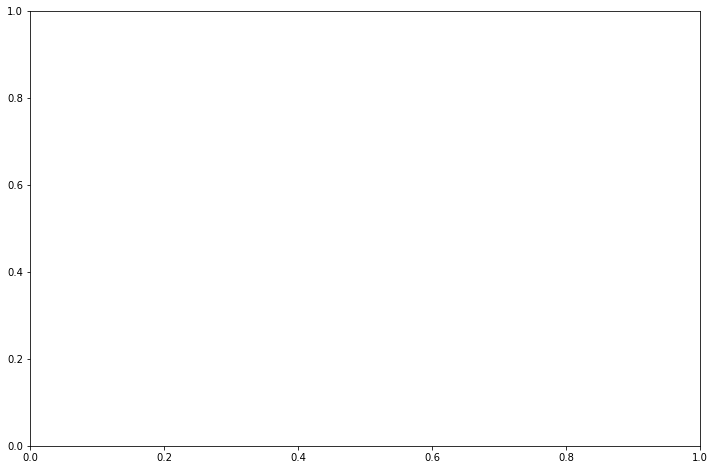

In [188]:
fig, ax = plt.subplots(figsize=(12,8))
# ax.stackplot(yearsNHE, totalExpenditure_percap, healthInsurance_percap, outOfPocket_percap)